In [356]:
#.. Imports
import numpy as np             
import os
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz

In [357]:
#.. Read csv file into dataframe (df)
try:
    df = pd.read_csv("./BDU.csv")
except FileNotFoundError:
    print("File not found")

In [358]:
# Drop missing values "M"
df.replace("M", np.nan, inplace=True)
df.dropna(axis=0,inplace=True)

# Variables need to be integers
df["tmpf"] = df["tmpf"].astype(float).astype(int)
df["relh"] = df["relh"].astype(float).astype(int)
df["drct"] = df["drct"].astype(float).astype(int)
df["sped"] = df["sped"].astype(float).astype(int)

# Split time into separate columns for year, month, day, etc.
split_time = df["valid"].str.split("-|\s|:", n = 4, expand = True) 
df["year"] = split_time[0]
df["month"] = split_time[1] 
df["day"] = split_time[2]
df["hour"] = split_time[3]
df["minute"] = split_time[4]
df["year"] = df["year"].astype(float).astype(int)
df["month"] = df["month"].astype(float).astype(int)
df["day"] = df["day"].astype(float).astype(int)
df["hour"] = df["hour"].astype(float).astype(int)
df["minute"] = df["minute"].astype(float).astype(int)

# Set time as index
df_time = pd.to_datetime(df[['year','month','day','hour','minute']])
df["valid"] = df_time
df.index = df.valid
df.drop(columns=["valid"], inplace = True)

df

,station,tmpf,relh,drct,sped,year,month,day,hour,minute
valid,,,,,,,,,,
2011-01-01 00:16:00,BDU,8,71,180,4,2011,1,1,0,16
2011-01-01 00:36:00,BDU,8,66,160,3,2011,1,1,0,36
2011-01-01 00:56:00,BDU,8,71,80,3,2011,1,1,0,56
2011-01-01 01:16:00,BDU,8,71,150,3,2011,1,1,1,16
2011-01-01 01:56:00,BDU,8,71,120,3,2011,1,1,1,56
...,...,...,...,...,...,...,...,...,...,...
2020-12-30 22:35:00,BDU,33,43,360,4,2020,12,30,22,35
2020-12-30 22:55:00,BDU,33,43,10,5,2020,12,30,22,55
2020-12-30 23:15:00,BDU,32,46,0,0,2020,12,30,23,15


In [359]:
feature = ["month", "relh", "drct"]
X = df[feature]
y = df.tmpf

In [360]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [361]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=10)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [362]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.19834917129976473


Text(0.5, 1.0, 'ASOS mean = 52.02$^\\circ$F and $\\sigma$ = 18.97$^\\circ$F \n ML mean = 52.89$^\\circ$F and $\\sigma$ = 18.27$^\\circ$F')

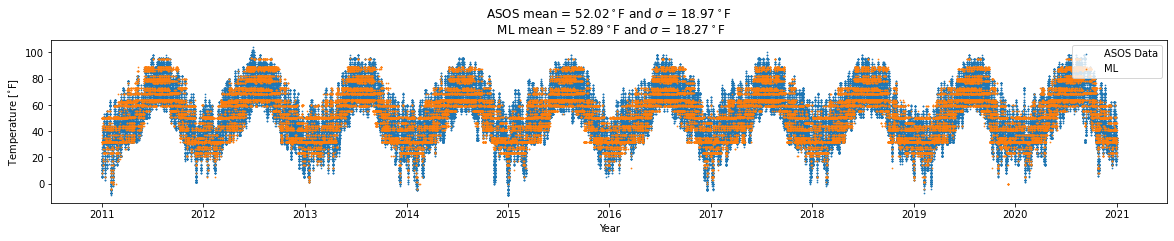

In [363]:
fig, ax = plt.subplots(figsize=(20,3))

ax.scatter(df.index,df.tmpf,color='C0',s=0.5, label = "ASOS Data")
ax.scatter(y_test.index,y_pred,color='C1',s=0.5, label = "ML")
ax.set_ylabel(r"Temperature [$^{\circ}$F]")
ax.set_xlabel("Year")
ax.legend(loc="upper right")
ax.set_title("ASOS mean = {0}$^\circ$F and $\sigma$ = {1}$^\circ$F \n ML mean = {2}$^\circ$F \
and $\sigma$ = {3}$^\circ$F".format(round(df.tmpf.mean(),2), round(df.tmpf.std(),2), round(np.mean(y_pred),2), round(np.std(y_pred),2)))